In [0]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
#Fashion MNIST data - load
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

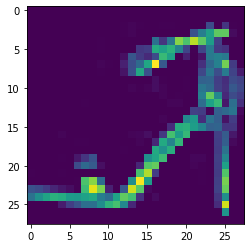

In [0]:
import matplotlib.pyplot as plt
plt.imshow(training_images[8])
print(training_labels[0])
print(training_images[0])

In [0]:
#normalize 
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [0]:
#build model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: Remember earlier where our images were a square, when you printed them out? Flatten just takes that square and turns it into a 1 dimensional set.

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. There's lots of options, but just use these for now.

Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it saves you from fishing through it looking for the biggest value, and turns it into [0,0,0,0,1,0,0,0,0] -- The goal is to save a lot of coding!

In [0]:
#compile and train
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 0.5004 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3771 - acc: 0.8637
Epoch 3/5
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3392 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3142 - acc: 0.8850
Epoch 5/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2948 - acc: 0.8909


In [0]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3571 - acc: 0.8694


[0.3571434146165848, 0.8694]

In [0]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[5.3050306e-05 6.8967736e-08 1.1554665e-06 1.3632412e-07 1.4929793e-06
 1.2231612e-02 1.5945787e-06 7.8572460e-02 2.0793075e-05 9.0911758e-01]
9


In [0]:
#Try 512 and 1024 neurons